## Measuring running time of an algorithm implemented in numpy
https://leetcode.com/problems/check-if-matrix-is-x-matrix/

In [1]:
import numpy as np
import time
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

In [2]:
def sol1(x):
    n, _ = x.shape
    d = np.arange(n)
    mask = np.zeros((n, n), dtype=bool)
    mask[d, d] = mask[d, d[::-1]] = True

    return np.logical_and(
        not np.isclose(x[mask], 0).any(),
        np.allclose(x[~mask], 0)
    )


def sol2(x):
    n = len(x)
    i = np.identity(n, dtype=int)
    return np.array_equal(np.minimum(x, 1), np.maximum(i, np.flip(i, 1)))


def sol3(x):
    n = len(x)
    i = np.identity(n, dtype=int)
    return np.array_equal(np.minimum(x, 1), i | np.flip(i, 1))


def sol4(x):
    n, _ = x.shape

    if np.isclose(np.diag(x), 0).any():
        return False

    if np.isclose(np.diag(x[::-1]), 0).any():
        return False

    x -= np.diag(np.diagonal(x))
    x -= np.diag(np.diagonal(x[:, ::-1]))[:, ::-1]

    return np.allclose(x, 0)

In [3]:
def measure(func, n):
    x = np.random.uniform(-1, 1, size=(n, n))
    t1 = time.perf_counter_ns()
    _ = func(x)
    t2 = time.perf_counter_ns()
    return (t2 - t1) * 1e-6

In [4]:
ns = np.arange(2, 200)
num_trials = 1000

tss = {
    key: [[measure(globals()[key], n) for _ in range(num_trials)] for n in tqdm(ns, desc=key)]
    for key in ['sol1', 'sol2', 'sol3', 'sol4']
}

sol4: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:36<00:00,  5.46it/s]


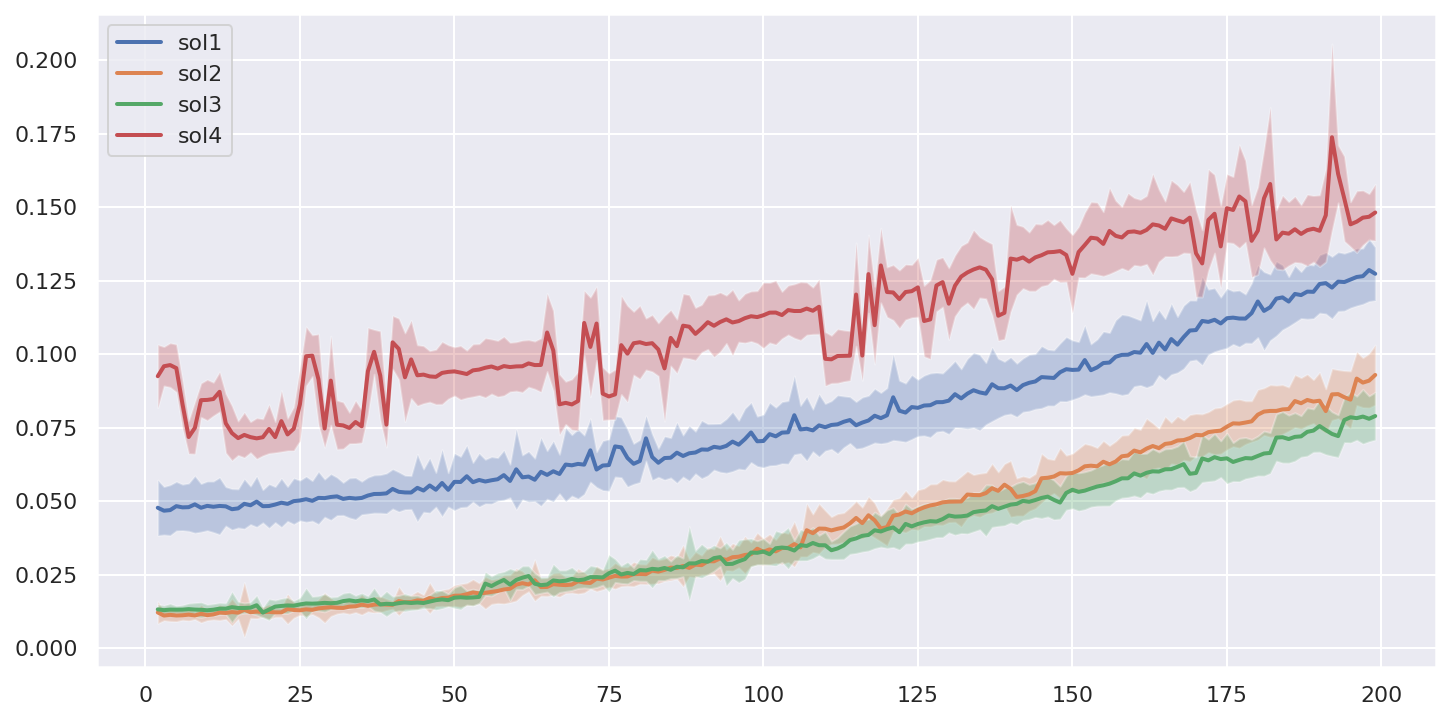

In [5]:
plt.figure(figsize=(12, 6))

for key, ts in tss.items():
    μs = np.array([np.mean(t) for t in ts])
    σs = np.array([np.std(t) for t in ts])
    
    plt.plot(ns, μs, lw=2, label=key)
    plt.fill_between(ns, μs - σs, μs + σs, alpha=0.3)
    
# plt.xticks(np.logspace(1, 9, base=2, num=9))
# plt.yscale('log')
# plt.xscale('log')
plt.legend()



pass